# HAM10000 Exploratory Data Analysis

This notebook provides an overview of the HAM10000 dataset used for melanoma detection.

**Dataset Source**: [Kaggle HAM10000](https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000)

**Contents**:
1. Target distribution analysis
2. Demographic analysis (age, sex)
3. Data structure overview

In [18]:
import pathlib

import pandas as pd
from IPython import display

ROOT = pathlib.Path("__file__").parent.resolve()
EDA_IMGS = pathlib.Path(ROOT / ".." / "artifacts" / "imgs" / "00_eda").resolve()

In [19]:
!ls {EDA_IMGS}

age_by_target.png     localization_topk.png target_counts.png
lesion_type_top10.png sex_by_target.png


## Target Distribution

To create the processed dataset, run:
```bash
python src/data/build_data.py
```

To generate EDA plots, run:
```bash
python src/plotting/eda.py
```

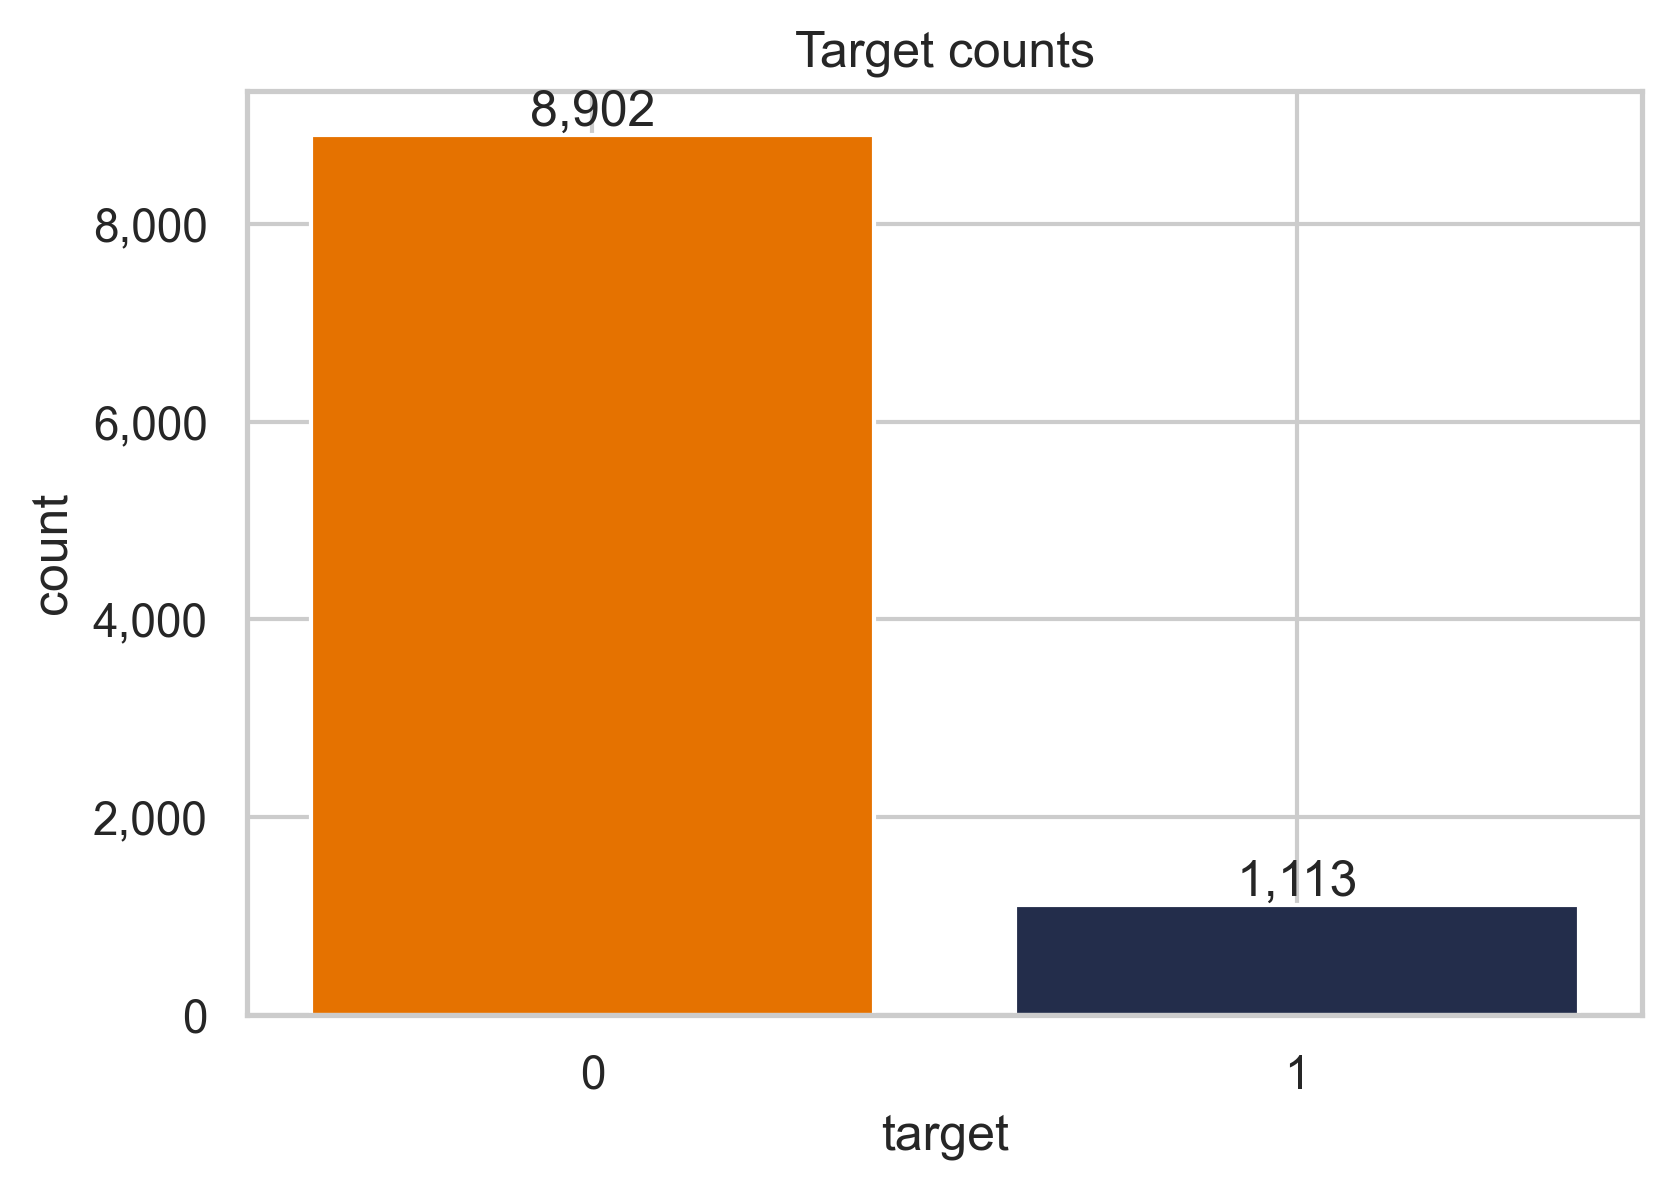

In [20]:
display.Image(EDA_IMGS / "target_counts.png", width=600, height=400)

**Figure 1** - Target Profile

Approximately 10% of all images have a melanoma diagnosis, indicating significant class imbalance.

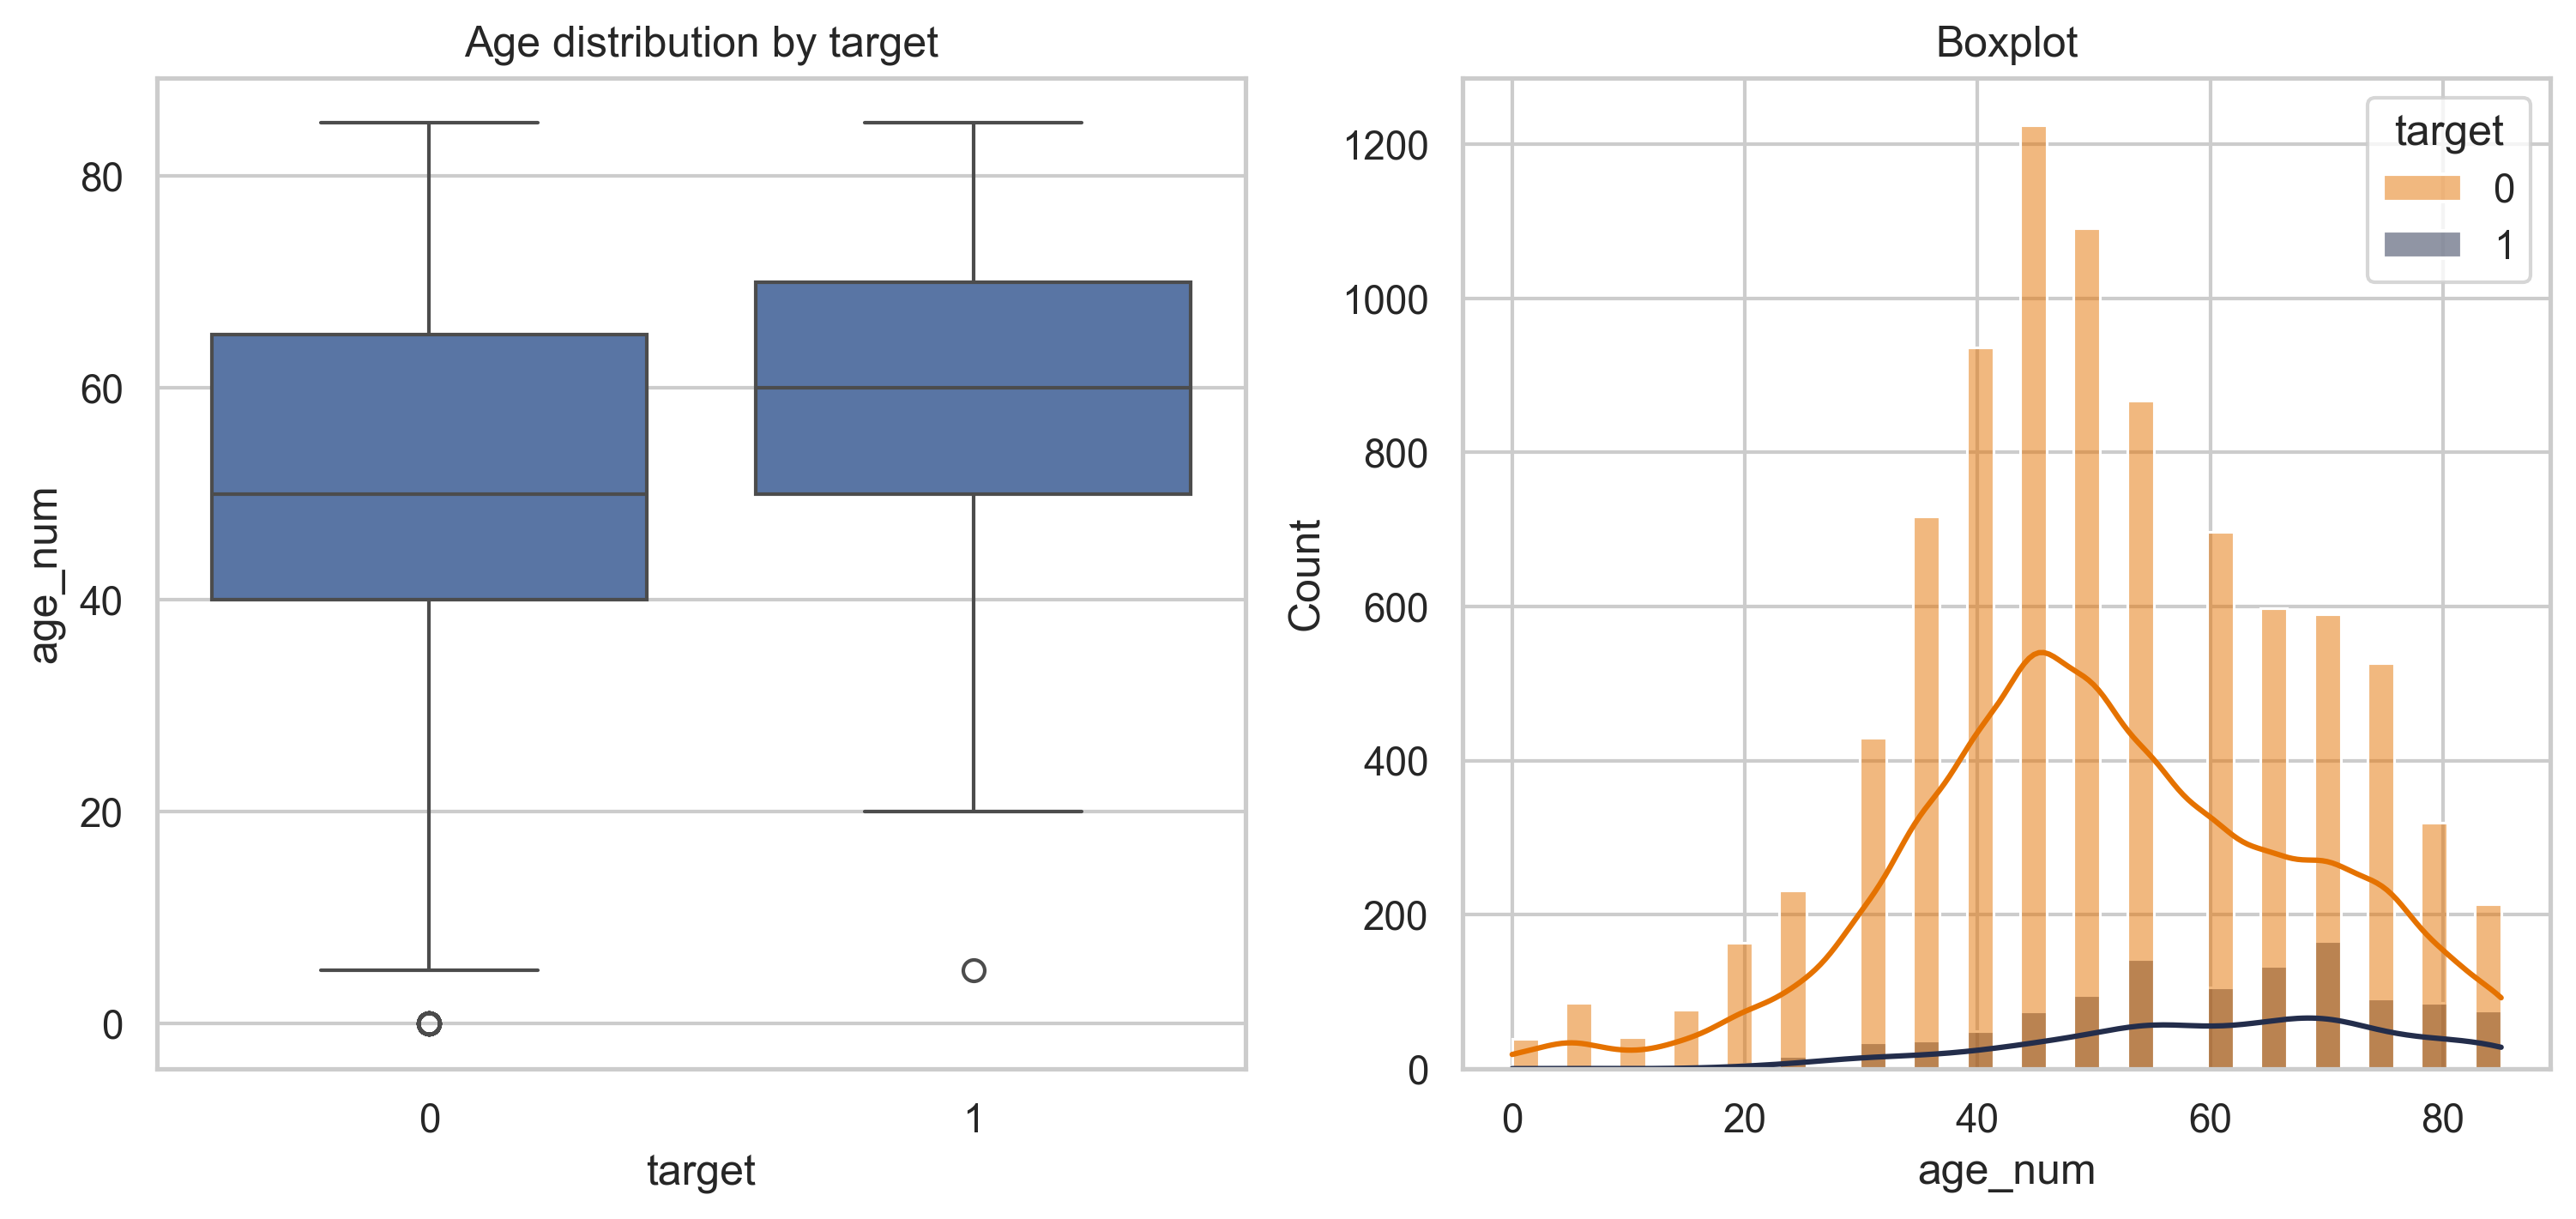

In [21]:
display.Image(EDA_IMGS / "age_by_target.png", width=1000, height=600)


**Figure 2** - Age by Target

Patients diagnosed with skin cancer tend to be older.

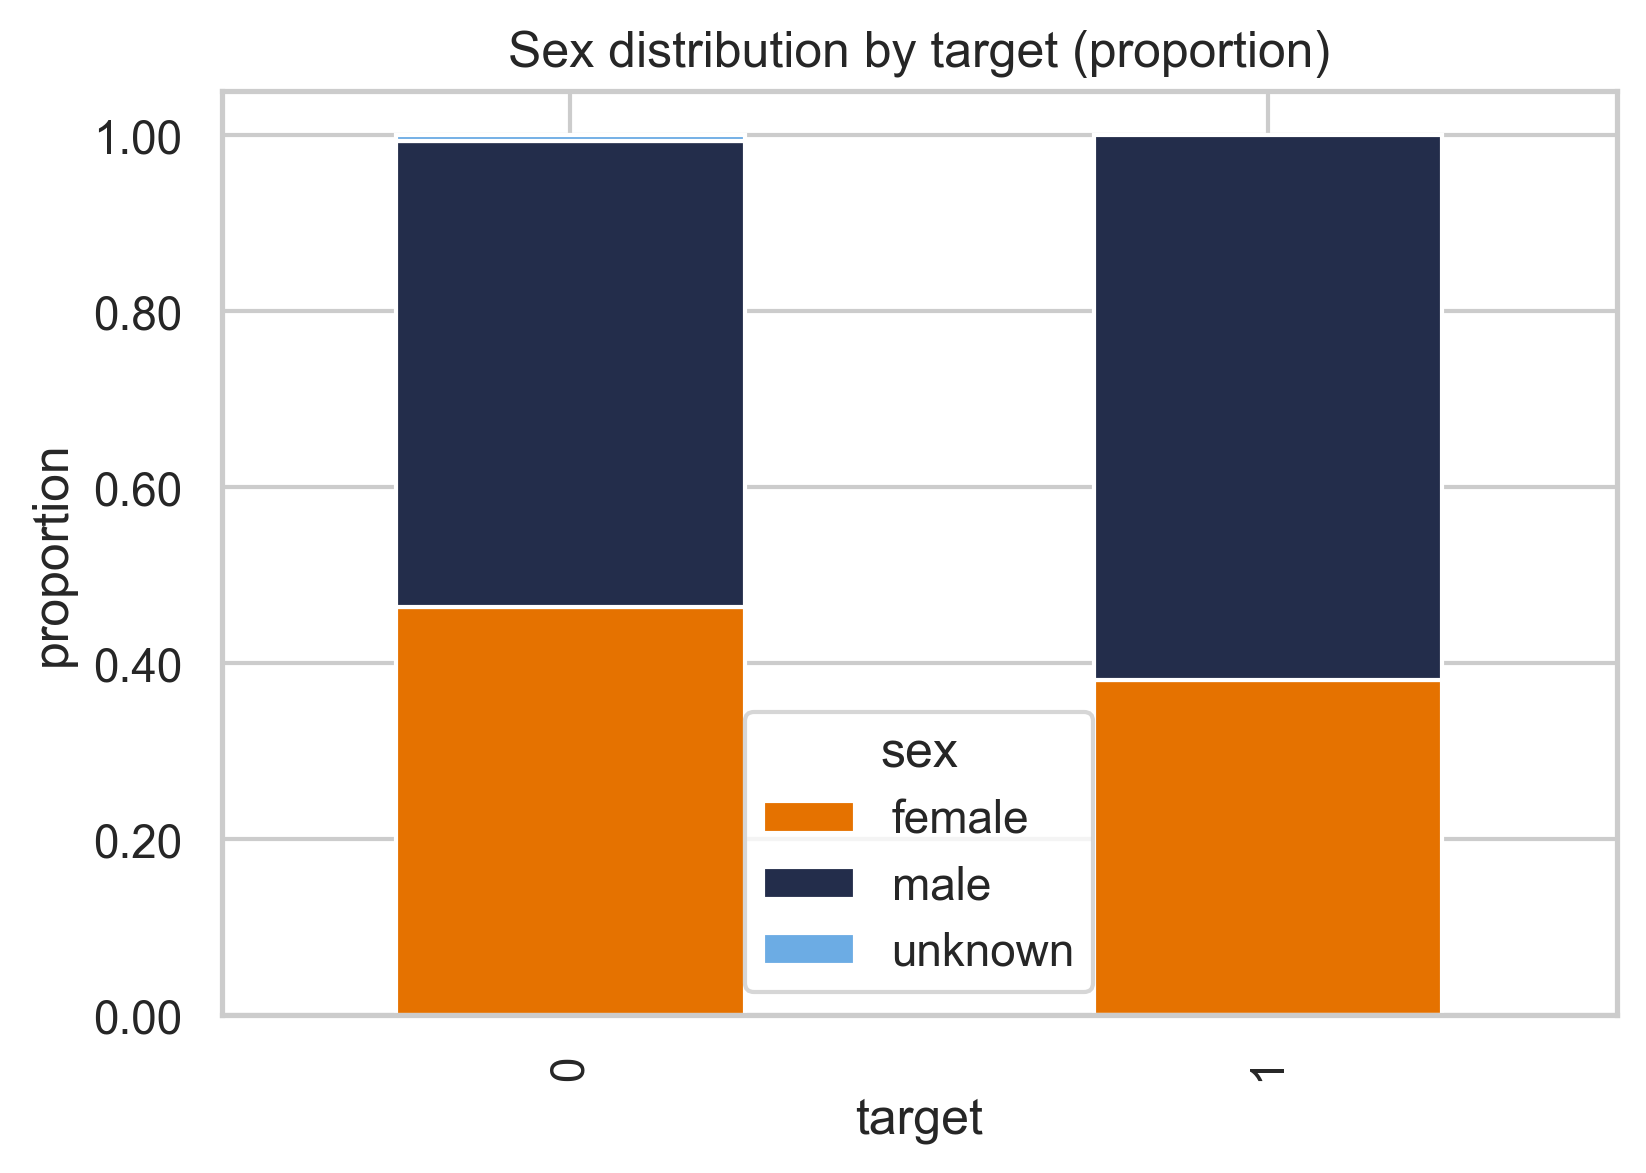

In [22]:
display.Image(EDA_IMGS / "sex_by_target.png", width=600, height=400)


**Figure 3** - Target by Sex

Males show a higher incidence of skin cancer in this sample.

## Data Structure

After downloading and extracting the data using `scripts/download_data.sh`, the structure will look similar to the following:

In [23]:
# view ham1000 info files
!du -h ../data/raw/ham_1000_archive/*.csv
!du -h ../data/raw/ham_1000_archive/images/

552K	../data/raw/ham_1000_archive/HAM10000_metadata.csv
 29M	../data/raw/ham_1000_archive/hmnist_28_28_L.csv
 88M	../data/raw/ham_1000_archive/hmnist_28_28_RGB.csv
2.4M	../data/raw/ham_1000_archive/hmnist_8_8_L.csv
7.2M	../data/raw/ham_1000_archive/hmnist_8_8_RGB.csv
2.6G	../data/raw/ham_1000_archive/images/


In [24]:
df_meta = pd.read_csv("../data/raw/ham_1000_archive/HAM10000_metadata.csv")
df_meta.head(2).T

,0,1
lesion_id,HAM_0000118,HAM_0000118
image_id,ISIC_0027419,ISIC_0025030
dx,bkl,bkl
dx_type,histo,histo
age,80.0,80.0
sex,male,male
localization,scalp,scalp


### Different Resolutions

In [25]:
df_28 = pd.read_csv("../data/raw/ham_1000_archive/hmnist_28_28_L.csv")
# columns = 28 * 28 + 1 label
df_28.head(2).T

,0,1
pixel0000,169,19
pixel0001,171,57
pixel0002,170,105
pixel0003,177,140
pixel0004,181,149
...,...,...
pixel0780,140,89
pixel0781,140,47
pixel0782,159,18
pixel0783,165,18


In [26]:
# significantly smaller version 8x8 +1 label
df_8 = pd.read_csv("../data/raw/ham_1000_archive/hmnist_8_8_L.csv")
df_8.head(2).T

,0,1
pixel0000,172,98
pixel0001,182,149
pixel0002,191,170
pixel0003,183,193
pixel0004,180,183
...,...,...
pixel0060,184,192
pixel0061,183,181
pixel0062,171,143
pixel0063,157,58
